In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
import csv
import os
from PIL import Image

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
def img_show(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

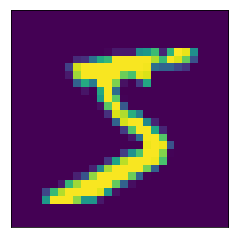

In [4]:
img_show(x_train[0])

In [53]:
path = 'x_train'
if not os.path.exists(path):
    os.makedirs(path)
for i, j in enumerate(x_train):
    img = Image.fromarray(j)
    img_name = '%s/%s.png' % (path, i)
    img.save(img_name, 'png')

In [14]:
path = 'x_test'
if not os.path.exists(path):
    os.makedirs(path)
for i, j in enumerate(x_test):
    img = Image.fromarray(j)
    img_name = '%s/%s.png' % (path, i)
    img.save(img_name, 'png')

In [67]:
with open('y_test.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(y_test_list)

In [15]:
def channel_convert(path):
    img = cv.imread(path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    return img2

In [17]:
path = 'original/x_train/'
for i in os.listdir(path):
    img = path + i
    img = channel_convert(img)
    img = Image.fromarray(img)
    img_name = 'channel3/x_train/' + i
    img.save(img_name, 'png')

In [46]:
def img_load(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)    
    return img

In [47]:
img = img_load('channel3/x_train/0.png')

In [56]:
def img_resize(img):
    img = Image.fromarray(img)
    img = img.resize((32, 32), Image.ANTIALIAS)
    return img

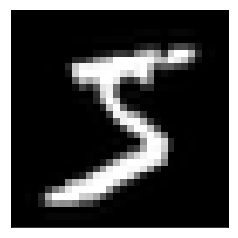

In [50]:
img = img_resize(img)
img_show(img)

In [58]:
path = 'channel3/x_test/'
for i in os.listdir(path):
    img = path + i
    img = img_load(img)
    img = img_resize(img)
    img_name = 'channel3_32/x_test/' + i
    img.save(img_name, 'png')